[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]
 
[ 1.487   1.937   2.535   2.985   3.585   3.1034  4.635   4.108   5.688
  5.1126  6.742   6.1171  7.804   7.1216  8.202   8.1261  9.247   9.1306
 10.29   10.718  11.331  11.776  12.368  12.825  13.407  13.865  14.442
 14.9    15.479  15.934  16.514  16.968  17.55   17.1001 18.585  18.1032
 19.621  19.1065 20.657  20.1095 21.698  21.1128 22.745  22.116  23.142
 23.1192 24.178  24.123  25.217  25.644  26.263  26.715  27.315  27.777
 28.369  28.83   29.425  29.879  30.478  30.927  31.53   31.97   32.58
 32.1012 33.63   33.1054 34.679  34.1092 35.73   35.1129 36.92   36.1164
 37.133  37.12   38.174  38.594  39.219  39.675  40.269  40.742  41.321
 41.794 ]
 
[ 6.57 -0.39  5.38 -1.74 

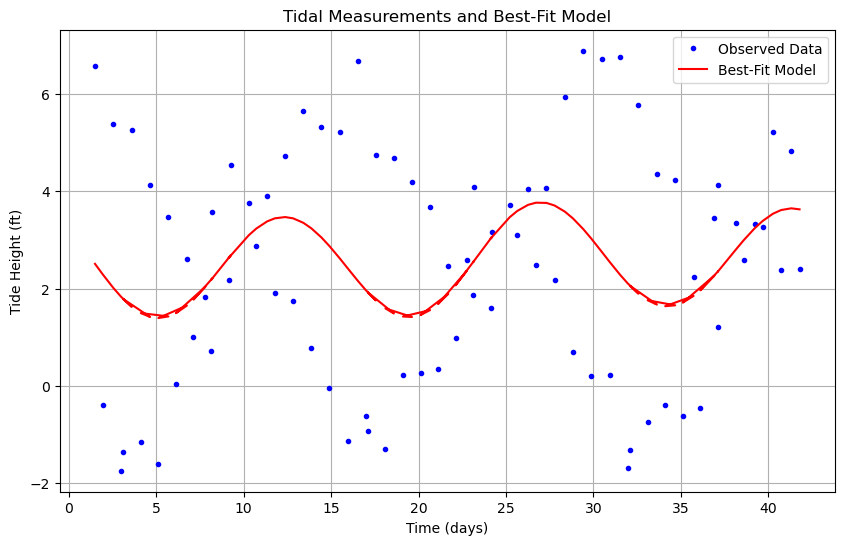

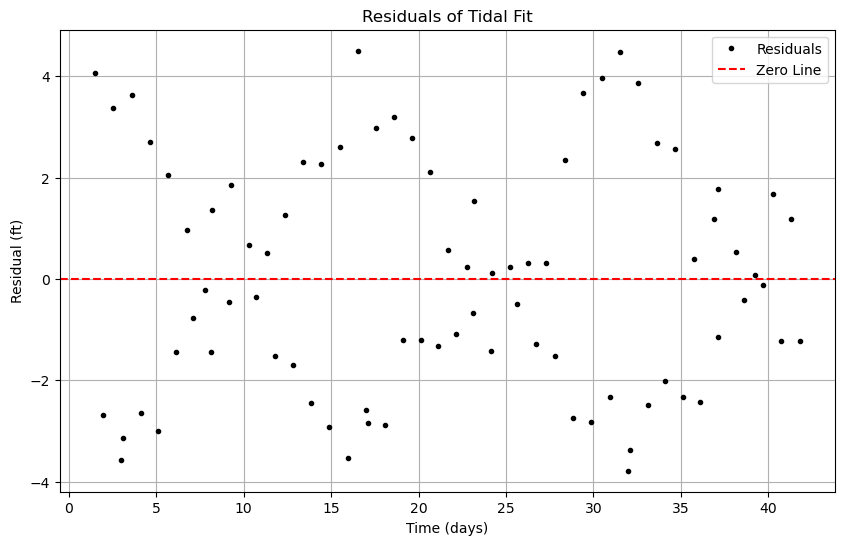

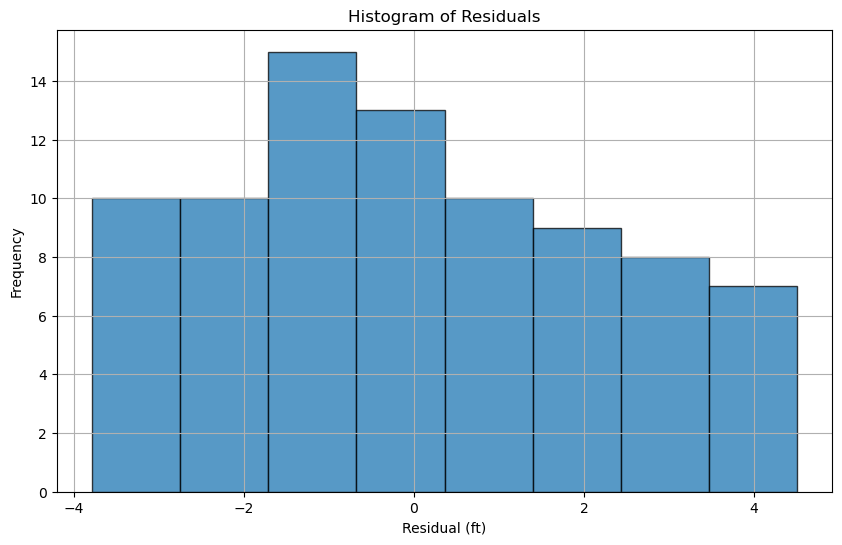

Standard deviation of residuals: 2.2563542088336925
Intrinsic scatter (accounting for measurement error): 2.2424616642702095
Z-score is = 0.8863856535334487


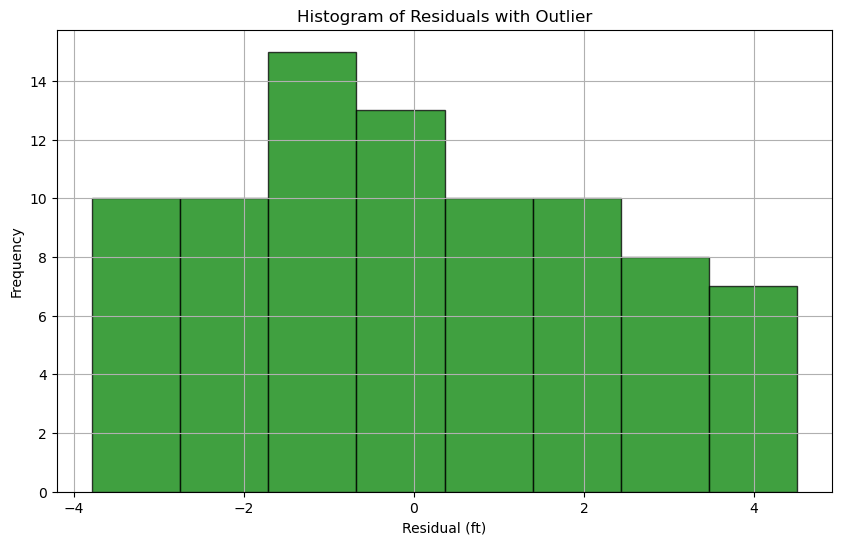

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.genfromtxt("/Users/brand/Downloads/ASTR19_F24_group_project_data.txt", 
                     dtype=[('myint','i8'),('mystring','S5'),('myfloat','f8')])

def convertTimeToNum(t):
  hours, minutes, = map(int, t) #use map to convert strings to ints
  return hours*60 + minutes

day = []
time = []
height = []

for i in range (82):
    day.append(data[i][0])
    t = convertTimeToNum(data[i][1].decode("utf-8").split(":")) #grab time
    combine = f"{data[i][0]}.{t}" #combine into decimal
    combine = float(combine)
    time.append(combine)
    height.append(data[i][2])

time = np.array(time)
height = np.array(height)

#defining oscillatory function
def tidal_model(t, amp1, amp2, freq1, freq2, phase1, phase2,vert1, vert2):
   return (amp1 * np.cos(freq1 * (t) + phase1) + vert1) + (amp2 * np.cos(freq2 * (t) + phase2) + vert2)

# do we need initial guess for the parameters [a1, a2, w1, w2, p1, p2, t0] ??
p0 = [6.57, -0.39, 2 * np.pi/ 12, 2 * np.pi / 24, 0, np.pi, 2.0, 2.0]

#using curve_fit
error = 0.25
params, params_cov = curve_fit(tidal_model, time, height, p0=p0, 
                               sigma=np.full_like(height, error))
'''
#extracting best-fit parameters
a_fit, f_fit, p_fit, b_fit = params
'''

# generating model values
fitted_tide = tidal_model(time, *params)

print(day)
print(' ')
print(time)
print(' ')
print(height)

'''
plt.scatter(time, height)
plt.plot(time, fitted_model, color = 'red')
#plt.plot(height, '-o')
plt.ylabel("Height")
plt.xlabel("Time")
'''

plt.figure(figsize=(10, 6))
plt.plot(time, height, 'b.', label='Observed Data')
plt.plot(time, fitted_tide, 'r-', label='Best-Fit Model')
plt.xlabel('Time (days)')
plt.ylabel('Tide Height (ft)')
plt.title('Tidal Measurements and Best-Fit Model')
plt.legend()
plt.grid()
plt.savefig("tidal_fit.pdf")
plt.show()

# /defining and plotting residuals
residuals = height - fitted_tide
plt.figure(figsize=(10, 6))
plt.plot(time, residuals, 'k.', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Time (days)')
plt.ylabel('Residual (ft)')
plt.title('Residuals of Tidal Fit')
plt.legend()
plt.grid()
plt.savefig("residuals_plot.pdf")
plt.show()

# histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins="auto", edgecolor="black", alpha=0.75)
plt.xlabel('Residual (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid()
plt.savefig("residuals_histogram.pdf")
plt.show()

# calculating standard deviation
std_residuals = np.std(residuals)

# intrinsic scatter???
intrinsic_scatter = np.sqrt(std_residuals**2 - error**2)

print("Standard deviation of residuals:", std_residuals)
print("Intrinsic scatter (accounting for measurement error):", intrinsic_scatter)

#part 4 2ft outlier
outlier = 2
z_score = outlier / std_residuals
residuals_outlier = list(residuals)
residuals_outlier.append(outlier)

print(f"Z-score is = {z_score}")

# Plot the histogram with the outlier
plt.figure(figsize=(10, 6))
plt.hist(residuals_outlier, color = 'green', bins="auto", edgecolor="black", alpha=0.75)
plt.xlabel('Residual (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Outlier')
plt.grid()
plt.savefig("residuals_histogram_with_outlier.pdf")
plt.show()